In [47]:
setwd('~/r_projects/stat634/')

In [50]:
library(tidyverse)
library(ggplot2)
source('AIS/initial_testing.R')

In [7]:
ais_info <- format_inputs()

In [8]:
head(ais_info)

id,Score,State,Category,Capacity
<dbl>,<fct>,<chr>,<chr>,<dbl>
1,5,MD,Situational,1
2,3,MD,Situational,2
3,3,MD,Situational,3
4,5,MD,Situational,4
5,5,MD,Situational,5
6,3,MD,Situational,6


In [9]:
chisq_results <- chisq_test()

In [11]:
chisq_results


	Pearson's Chi-squared test

data:  prep_chi_square_tbl()
X-squared = 9.0237, df = 2, p-value = 0.01098


In [54]:
ais_summary <- ais_info %>% group_by(State, Score) %>% count()

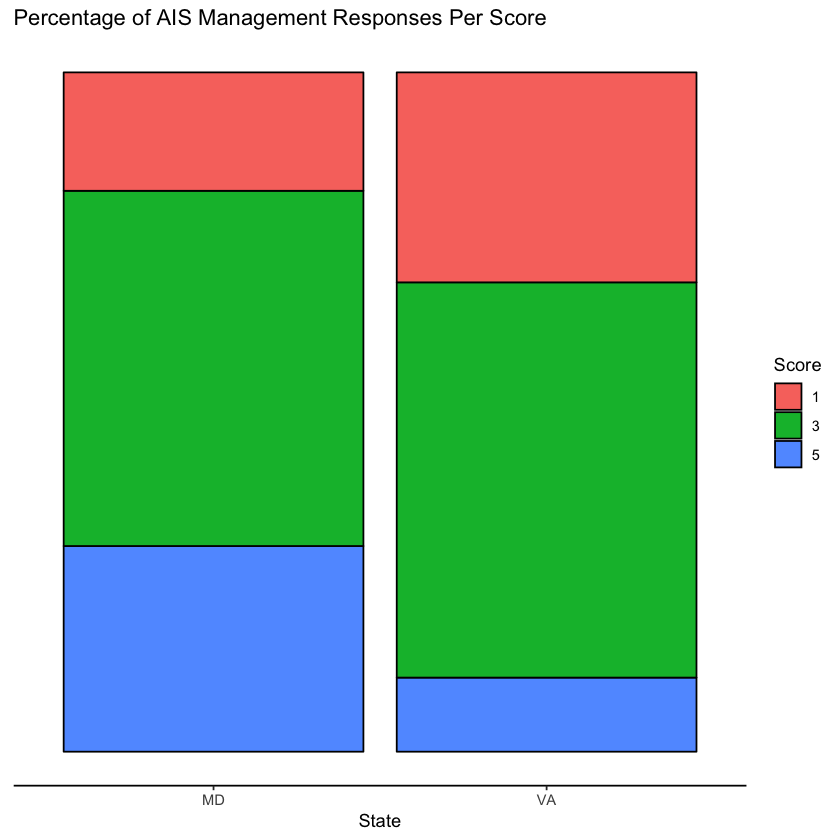

In [61]:
ggplot(ais_summary, aes(x=State,y=n,fill=Score)) + 
    geom_bar(stat="identity", position="fill", colour="black") + 
    theme_classic() + 
    theme(axis.title.y = element_blank(), axis.text.y = element_blank(), 
      axis.ticks.y = element_blank(), axis.line.y = element_blank()) + ggtitle("Percentage of AIS Management Responses Per Score")